# K-means Project Tutorial

* Problem: We want to be able to classify houses according to their region and median income. 
* We will use the famous California Housing dataset
* It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.



In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# we are only interested in the Latitude, Longitude and MedInc columns.

columns_to_keep = ["Latitude", "Longitude", "MedInc"]
data = data[columns_to_keep]
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [36]:
data.shape

(20640, 3)

In [37]:
# Divide into train and test
X = data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


* **Step 2: Build a K-Means:**

Classify the data into 6 clusters using the K-Means model. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

In [38]:
# Apply & Predict the model to the train set
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)
X_train_centroids = model.cluster_centers_
X_train_labels = model.labels_
X_train["Cluster"] = X_train_labels
y_train = X_train_labels
X_train.head()


,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


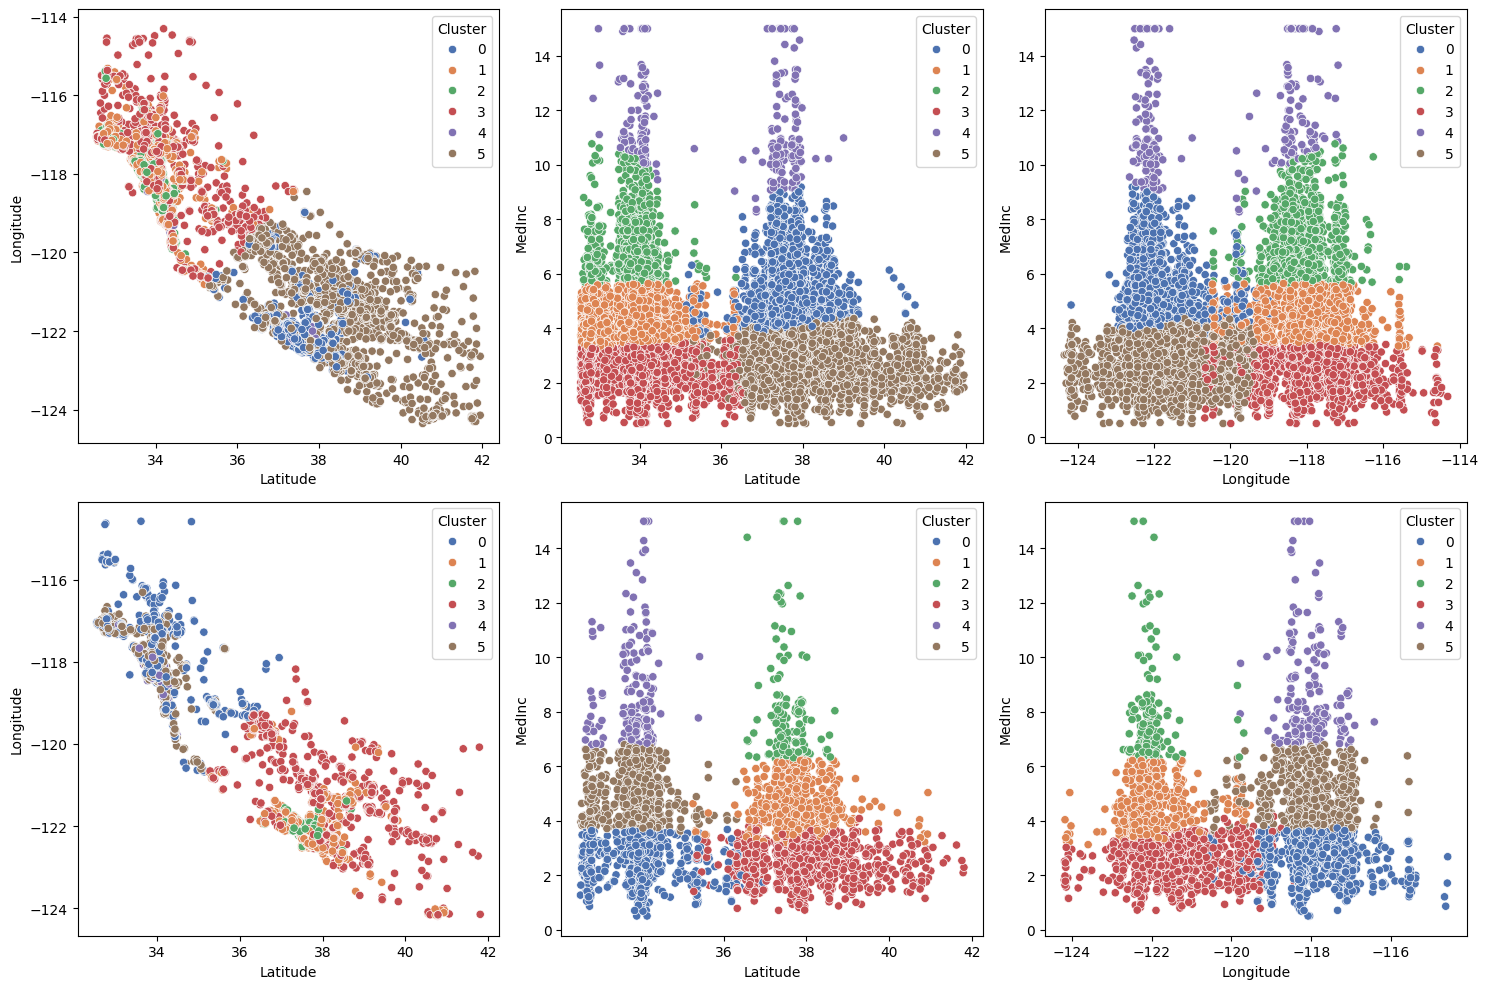

We can observe clear differences in the clusters in the same features -Latitude and Longitude vs MedInc- between train and test.
pointing out this clusterization might not be optimal. Further evaluation of the clusterization should be run


In [39]:
# Apply & Predict the model to the test set

model.fit(X_test)
X_test_labels = model.labels_
X_test["Cluster"] = X_test_labels
y_test = X_test_labels
X_test.head()

# Plot both train and set for comparsion after applying the model
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0,0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[0,1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[0,2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1,0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1,1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1,2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()
plt.show()

print("We can observe clear differences in the clusters in the same features -Latitude and Longitude vs MedInc- between train and test.\n"
      "pointing out this clusterization might not be optimal. Further evaluation of the clusterization should be run")


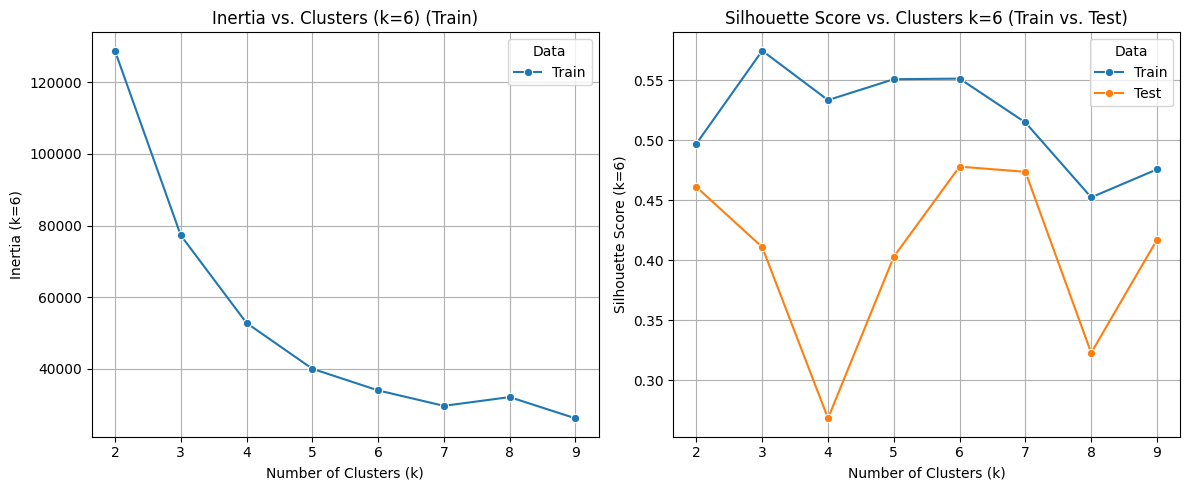

As we can observe here, the best potential k based on the Silhouette score are 6 or 7 while 4 and 5 seem to be the k with better Inertia.
Nevertheless and even taking the best performing k, the best Silhouette score we could aspire for is lower than acceptable (0.6) both for the Train set, and even lower for the Test set


In [40]:
# Train - Test model performance comparsion

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



k_values = range(2, 10)
random_state = 42
inertias_train = []
silhouette_scores_train = []
inertias_test = []
silhouette_scores_test = []

# Calculate metrics for train and test data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init="auto")

    # Train data
    kmeans.fit(X_train)
    inertias_train.append(kmeans.inertia_)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))

    # Test data
    labels_test = kmeans.predict(X_test)  
    silhouette_scores_test.append(silhouette_score(X_test, labels_test))

df_inertia = pd.DataFrame({
    'k': k_values,
    'Inertia': inertias_train,
    'Data': ['Train'] * len(k_values)
})

df_silhouette = pd.DataFrame({
    'k': list(k_values) * 2,
    'Silhouette': silhouette_scores_train + silhouette_scores_test,
    'Data': ['Train'] * len(k_values) + ['Test'] * len(k_values)
})

plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(1, 2, 1)
sns.lineplot(x='k', y='Inertia', hue='Data', data=df_inertia, marker='o')
plt.title('Inertia vs. Clusters (k=6) (Train)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (k=6)')
plt.grid(True)

# Silhouette plot
plt.subplot(1, 2, 2)
sns.lineplot(x='k', y='Silhouette', hue='Data', data=df_silhouette, marker='o')
plt.title('Silhouette Score vs. Clusters k=6 (Train vs. Test)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score (k=6)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("As we can observe here, the best potential k based on the Silhouette score are 6 or 7 while 4 and 5 seem to be the k with better Inertia.\n"
      "Nevertheless and even taking the best performing k, the best Silhouette score we could aspire for is lower than acceptable (0.6) both for the Train set, and even lower for the Test set")


In [41]:
X

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [ ]:
# Optimizing n_clusters 

# Reset data
X = data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()


from sklearn.cluster import KMeans

# Adjusting k 
model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)
X_train_centroids = model.cluster_centers_
X_train_labels = model.labels_
X_train["Cluster"] = X_train_labels
y_train = X_train_labels
X_train.head()

model.fit(X_test)
X_test_labels = model.labels_
X_test["Cluster"] = X_test_labels
y_test = X_test_labels
X_test.head()

# Train data
print(f"Train Silhouette Score: {silhouette_score(X_train, kmeans.labels_)}")

# Test data
print(f"Test Silhouette Score: {silhouette_score(X_test, kmeans.predict(X_test))}")

print("The previous observations are confirmed given that after adjusting k, the silhouette_score of the model doesn't improve above 60% in either train nor test,\n"
      "so keeping k to 6 seems the best choice with but with poor results (below 0.50 silhouette_score in either train or test)")


Train Silhouette Score: 0.475850034398952
Test Silhouette Score: 0.41719147832490017
The previous observations are confirmed given that after adjusting k, the mod doesn't improve the silhouette_score above 60% in either train nor test,
so keeping k to 6 seems the best choice with but with poor results (below 0.50 silhouette_score in either train or test)


In [54]:
# Running a Random Forest model for improvement

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

random_forest = RandomForestClassifier(random_state = 42)

# Train
random_forest.fit(X_train, y_train)

# Predict train
y_pred_train = random_forest.predict(X_train)

# Predict test
y_pred_test = random_forest.predict(X_test)

print(f"\n \n Random Forest Accuracy (test): {accuracy_score(y_test, y_pred_test)}")
print(f"\n Random Forest Accuracy (train): {accuracy_score(y_train, y_pred_train)}") 
print(f"\n \n Random Forest f1_score (test): {f1_score(y_test, y_pred_test, average='micro')}") 
print(f"\n Random Forest f1_score (train): {f1_score(y_train, y_pred_train, average='micro')}") 
print(f"\n \n Random Forest precision (test): {precision_score(y_test, y_pred_test, average='micro')}") 
print(f"\n Random Forest precision (train): {precision_score(y_train, y_pred_train, average='micro')}") 
print(f"\n \n Random Forest recall (test): {recall_score(y_test, y_pred_test, average='micro')}") 
print(f"\n Random Forest recall (train): {recall_score(y_train, y_pred_train, average='micro')}")




 
 Random Forest Accuracy (test): 0.841327519379845

 Random Forest Accuracy (train): 1.0

 
 Random Forest f1_score (test): 0.841327519379845

 Random Forest f1_score (train): 1.0

 
 Random Forest precision (test): 0.841327519379845

 Random Forest precision (train): 1.0

 
 Random Forest recall (test): 0.841327519379845

 Random Forest recall (train): 1.0


In [57]:
from pickle import dump



dump(model, open("k-means_default_42.sav", "wb"))
dump(random_forest, open("random_forest_default_42.sav", "wb"))